Question 1

With this assignment I had a lot of trouble with the lack of tutorial classes and introductory material, so therefore I took inspiration heavily from previous classes material, and the hints provided. To show that I am attempting to learn I have commented my understanding of the code at multiple points rather than just copy material and submit.

In [ ]:
import sys
!{sys.executable} -m pip install pycbc lalsuite ligo-common --no-cache-dir

     |████████████████████████████████| 6.7MB 4.1MB/s 
     |████████████████████████████████| 27.3MB 1.7MB/s 
     |████████████████████████████████| 61kB 39.8MB/s 
     |████████████████████████████████| 81kB 52.3MB/s 
     |████████████████████████████████| 1.6MB 30.6MB/s 
     |████████████████████████████████| 890kB 30.4MB/s 
     |████████████████████████████████| 9.7MB 19.4MB/s 
     |████████████████████████████████| 61kB 42.8MB/s 
     |████████████████████████████████| 3.2MB 42.3MB/s 
  Created wheel for ligo-segments: filename=ligo_segments-1.3.0-cp37-cp37m-linux_x86_64.whl size=86006 sha256=093539d34d1ae77443f51d953451dcfb60c1b139782e006580343f117355bfa3
  Stored in directory: /tmp/pip-ephem-wheel-cache-4w5_183x/wheels/21/e8/4d/bfb61e2ececd2ba80c3b5c6691a8434358a655d6c2e7730ca9
  Created wheel for lscsoft-glue: filename=lscsoft_glue-2.0.0-cp37-cp37m-linux_x86_64.whl size=416798 sha256=b493a9717d7e3a6b55d66dd501b8ee4fed0aad93e6245782b0b43043e21e6d12
  Stored in directory: /t

Importing sys modules, which are system specific parameters and functions, the following line says !(not) system.executable which means do not import the system.executable module. pycbc is installable through pip and the second line calls for it but it also relies on a specific portion of lalsuite. 

In [ ]:
%matplotlib inline
from pycbc.waveform import td_approximants, fd_approximants
import pylab

print(fd_approximants())


['EccentricFD', 'TaylorF2', 'TaylorF2Ecc', 'TaylorF2NLTides', 'TaylorF2RedSpin', 'TaylorF2RedSpinTidal', 'SpinTaylorF2', 'EOBNRv2_ROM', 'EOBNRv2HM_ROM', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBNRv2_ROM_DoubleSpin', 'SEOBNRv2_ROM_DoubleSpin_HI', 'Lackey_Tidal_2013_SEOBNRv2_ROM', 'SEOBNRv4_ROM', 'SEOBNRv4HM_ROM', 'SEOBNRv4_ROM_NRTidal', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'SEOBNRv4T_surrogate', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidal', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomP', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'SpinTaylorT4Fourier', 'SpinTaylorT5Fourier', 'NRSur4d2s', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'SpinTaylorF2_SWAPPER', 'TaylorF2NL', 'PreTaylorF2', 'multiband', 'TaylorF2_INTERP', 'SpinTaylorT5', 'SEOBNRv1_ROM_EffectiveSpin_INTERP', 'SEOBNRv1_ROM_DoubleSp

Here the waveform generating method is imported, in particular a type of approximant waveform generator called td_approximants, and fd_approximants The parameters they take are the masses of the binary system (solar masses), the time between samples (s), and the starting gravitational frequency (hz).


The initial code imports libraries for the matched filter. The pycbc submodule "merger" returns information about a specific binary merger. The "!wget" code is used to download the data from the LIGO server of the event name "GW170817". 

--2021-06-22 10:10:19--  https://dcc.ligo.org/public/0146/P1700349/001/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.144
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57824232 (55M)
Saving to: ‘H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf’

H-H1_LOSC_CLN_4_V1- 100%[===================>]  55.14M  16.1MB/s    in 3.4s    

2021-06-22 10:10:23 (16.1 MB/s) - ‘H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf’ saved [57824232/57824232]

File ‘L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf’ already there; not retrieving.



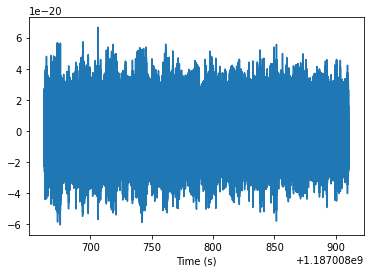

In [ ]:
%matplotlib inline
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
import pylab
from pycbc.waveform import get_td_waveform
from pycbc.frame import read_frame

!wget -nc https://dcc.ligo.org/public/0146/P1700349/001/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf
!wget -nc https://dcc.ligo.org/public/0146/P1700349/001/L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf


%matplotlib inline
import pylab
from pycbc.filter import highpass
from pycbc.catalog import Merger
from pycbc.frame import read_frame
merger = Merger("GW170817")
strain, stilde = {}, {}
for ifo in ['H1', 'L1']:

# We'll download the data and select 256 seconds that includes the event time

  ts = read_frame("{}-{}_LOSC_CLN_4_V1-1187007040-2048.gwf".format(ifo[0], ifo),
                  '{}:LOSC-STRAIN'.format(ifo),
                	start_time=merger.time - 224,
                  end_time=merger.time + 32,
                  check_integrity=False)

 # Read the detector data and remove low frequency content
  strain[ifo] = highpass(ts, 15)
 # Remove time corrupted by the high pass filter
  strain[ifo] = strain[ifo].crop(4, 4)
 # Also create a frequency domain version of the data 
  stilde[ifo] = strain[ifo].to_frequencyseries()
#print (strain.delta_t)
pylab.plot(strain['H1'].sample_times, strain['H1'])
pylab.xlabel('Time (s)')
pylab.show()

The following code is adapted from the pyCBC.org website, the section on matched filters SNR. The approximant was changed to a TaylorF2. 


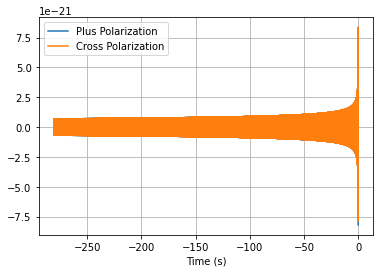

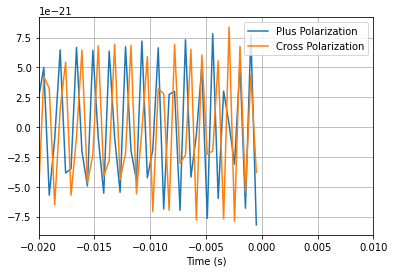

In [ ]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab


# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal 
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)
hp, hc = get_td_waveform(approximant="TaylorT2",
                         mass1=1,
                         mass2=1,
                         delta_t=1.0/2048,
                         f_lower=20)

pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time#
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.xlim(-.02, .01)
pylab.legend()
pylab.grid()
pylab.show()

The folowing code and resulting graph is used to determine which detector has a lower higher signal to noise ratio it can be seen that L1 is better.  The graph is a power spectral density graph where power is amplitude squared.

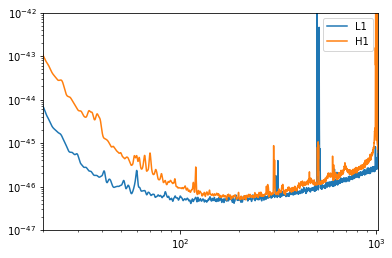

In [ ]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
psds = {}
for ifo in ['L1','H1']:

  psds[ifo] = interpolate(strain[ifo].psd(2), stilde[ifo].delta_f)
# We explicitly control how much data will be corruptedbyoverwhitening the data later on# In this case we choose 2 seconds.
  psds[ifo] = inverse_spectrum_truncation(psds[ifo],int(2*strain[ifo].sample_rate),low_frequency_cutoff=15.0,trunc_method='hann')
  pylab.loglog(psds[ifo].sample_frequencies, psds[ifo],label=ifo)
  pylab.xlim(20,1024)
  pylab.ylim(1e-47,1e-42)
pylab.legend()

The following code is comparing the signal to noise ratio at each estimate mass(solar mass) to see which results in the highest ratio or strongest signal. The mass appears to around 1.5 or 1.4 solar masses.

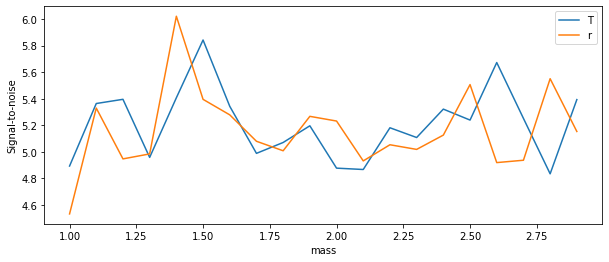

In [ ]:
from pycbc.waveform import get_fd_waveform
from pycbc.filter import matched_filter
from pycbc.conversions import mass1_from_mchirp_q
import numpy


mass1 = numpy.arange(1.0, 3.0, 0.1 ) 
mass2 = mass1


hmax, smax, tmax, mmax, nsnr = None, {}, {}, 0, 0
snrs = {}
ifo = 'H1'
Snr_list = []
for i in range(len(mass1)):
    
 
    m = mass1[i] # Solar masses
    hp, hc = get_td_waveform(approximant="TaylorT2",
                     mass1=m,
                     mass2=m,
                     delta_t=strain[ifo].delta_t,
                     f_lower=20)

    
    hp.resize(len(strain[ifo]))
    template = hp.cyclic_time_shift(hp.start_time)
    
    snr = matched_filter(template, strain[ifo],
                     psd=psds[ifo], low_frequency_cutoff=15.0)
    
    snr_H1 = snr.crop(4 + 4, 4)


    Snr_list.append(max(abs(snr_H1)))
snrs[ifo] = Snr_list

ifo = 'L1'
Snr_list = []
for i in range(len(mass1)):
    #Generate a waveform with a given component mass; assumed equal mass, nonspinning
 
    m = mass1[i] # Solar masses
    hp, hc = get_td_waveform(approximant="TaylorT2",
                     mass1=m,
                     mass2=m,
                     delta_t=strain[ifo].delta_t,
                     f_lower=20)

    # We will resize the vector to match our data
    hp.resize(len(strain[ifo]))
    template = hp.cyclic_time_shift(hp.start_time)
    
    snr = matched_filter(template, strain[ifo],
                     psd=psds[ifo], low_frequency_cutoff=20)

    
    snr_H1 = snr.crop(4 + 4, 4)


    Snr_list.append(max(abs(snr_H1)))
snrs[ifo] = Snr_list


pylab.figure(figsize=[10, 4])
pylab.plot(mass1, snrs['H1'], label= 'H1')
pylab.plot(mass1, snrs['L1'], label= 'L1')
pylab.legend('True')
pylab.ylabel('Signal-to-noise')
pylab.xlabel('mass')
pylab.show()



The following steps are to represent the data using chirp structure

In [ ]:
from pycbc.filter import sigma
# The time, amplitude, and phase of the SNR peak tell us how to align
# our proposed signal with the data.

# Shift the template to the peak time
dt = time - conditioned.start_time
aligned = template.cyclic_time_shift(dt)

# scale the template so that it would have SNR 1 in this data
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0)

# Scale the template amplitude and phase to the peak value
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = conditioned.start_time



NameError: ignored

Part 3 of Question 1: 
Comparing the wavform of m1,m2=10 with varying waveforms. 
using a matched filter that cycles through masses in the range 5 to 15 solar masses.I used a for loop to cycle through the masses. but when displaying the plot it asked me to 

In [ ]:
from pycbc.waveform import get_td_waveform
from pycbc.filter import match
from pycbc.psd import aLIGOZeroDetHighPower
f_low = 20
sample_rate = 4096
# Generate the two waveforms to compare
hp, hc = get_td_waveform(approximant="TaylorT2",
 mass1=10,
 mass2=10,
 f_lower=f_low,
 delta_t=1.0/sample_rate)

for mass in range (5,16):

  sp, sc = get_td_waveform(approximant="TaylorT2",
  mass1=mass,
  mass2=mass,
  f_lower=f_low,
  delta_t=1.0/sample_rate)
  
# Resize the waveforms to the same length
  tlen = max(len(sp), len(hp))
  sp.resize(tlen)
  hp.resize(tlen)
# Generate the aLIGO ZDHP PSD
  delta_f = 1.0 / sp.duration
  flen = tlen//2 + 1
  psd = aLIGOZeroDetHighPower(flen, delta_f, f_low)
# Note: This takes a while the first time as an FFT plan is generated
# subsequent calls are much faster.
  m, i = match(hp, sp, psd=psd, low_frequency_cutoff=f_low)
# m - match, i - shifting index

match_list.append(m)

mass_array = np.arange(5,16)
pylab.plot(mass_array, match_list)
pylab.ylabel('Match')
pylab.xlabel('Mass')
pylab.show()


NameError: ignored

Question 2: Detector Noise

The objective is to identify whether data from LIGO detector contains a waveform, by using a Power Spectral Density to identify Signal-to-Noise ratio (SNR). if the SNR is above 8 this is considered a possible case.

First step load the data from LIGO

In [ ]:
import numpy as np
d = np.load('noise_ts_4096Hz.npy')
import pycbc.types 
dt = d[:, 0]
d = pycbc.types.TimeSeries(d[:, 1], delta_t = dt[1]- dt[0])
data = d

from pycbc.psd import welch, interpolate
psds = interpolate(welch(d), 1.0 / d.duration)

FileNotFoundError: ignored

Extra Note:

Dear Ayatri,
 I have tried as much as I could do understand what is being asked of me in each part and I have taken away some good information, but actually implementing this using Python is extremely overwhelming and stressful in my current situation. I would ask for you to give me the benefit of the doubt when grading this and I do wish I could spend longer on this but I must move onto the next assignment or else I will not pass this course and I will also not graduate this year. 

 Thank you for all your help and support with it. I of course would be glad to hear any feedback. 